# Detalhes do projeto
- Data wrangling, que consiste em:
    - Coletar dados
    - Avaliar dados
    - Limpar dados
- Armazenar, analisar e visualizar seus dados wrangled
- Elaborar relatórios sobre 1) seus esforços de data wrangling 2) suas análises e visualizações de dados


# Coletar dados

In [33]:
%matplotlib inline

import tweepy
import json
import re
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq

### Dados

In [2]:
data_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
data_image_archive = pd.read_csv('image-predictions.tsv', "\t")

### Acesso a API

In [3]:
consumer_key = '-'
consumer_secret = '-'
access_token = '-'
access_secret = '-'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


file = open("tweet_json.txt", "a+") 
fails_dict = pd.DataFrame(columns=['id'])
'''
for id in data_twitter_archive['tweet_id']:

    try:
        twitter = api.get_status(id)
        #rt = twitter['retweet_count']
        #fv = twitter['favorite_count']
        json.dump(twitter._json, file)
        file.write('\n')
        #file.write(str(id)+','+str(rt)+','+str(fv)+'\n')
    except Exception as erro:
        fails_dict.loc[len(fails_dict)] = [id]

'''
file.close()

print(fails_dict)


Empty DataFrame
Columns: [id]
Index: []


In [4]:
df = pd.read_json("tweet_json.txt", lines = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2342 entries, 0 to 2341
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2342 non-null datetime64[ns]
entities                         2342 non-null object
extended_entities                1823 non-null object
favorite_count                   2342 non-null int64
favorited                        2342 non-null bool
geo                              0 non-null float64
id                               2342 non-null int64
id_str                           2342 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
is_quote_status                  2342 non-null bool
lang                             2342 no

In [5]:
twitter_favorites_retweet = df.iloc[:,[8, 23,5]]
twitter_favorites_retweet = twitter_favorites_retweet.rename(index=str, columns={"id": "tweet_id"})
twitter_favorites_retweet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 73.2+ KB


# Avaliar dados

In [6]:
data_twitter_archive.info()
data_twitter_archive.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


- As colunas doggo, floofer, pupper, puppo são referrentes a estágio dos cachorros, esses dados devem ser agrupados em uma coluna.

- Timestamp está com o tipo de dado errado.

In [7]:
data_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

- Os valores dos numeradores apresentam dados fora do normal

In [8]:
data_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

- Os valores dos denominadores apresentam dados fora do normal

In [9]:
data_twitter_archive.name.value_counts()

None        745
a            55
Charlie      12
Lucy         11
Oliver       11
Cooper       11
Lola         10
Tucker       10
Penny        10
Bo            9
Winston       9
the           8
Sadie         8
Buddy         7
Toby          7
Bailey        7
an            7
Daisy         7
Leo           6
Dave          6
Rusty         6
Koda          6
Jack          6
Jax           6
Scout         6
Bella         6
Milo          6
Stanley       6
Oscar         6
Gus           5
           ... 
Huxley        1
Dot           1
Patch         1
William       1
Bobble        1
Kody          1
DonDon        1
Chuck         1
Harlso        1
Stuart        1
Asher         1
Mollie        1
Noah          1
Craig         1
Adele         1
Miley         1
Carbon        1
Brooks        1
Marty         1
Brandy        1
Wiggles       1
Frönq         1
Linus         1
Darrel        1
Ed            1
Lulu          1
Bauer         1
Carll         1
Rufio         1
Ashleigh      1
Name: name, Length: 957,

- Há nomes incorretos para os cachorros. Ex.: 'a', 'the', 'an' e 'None'. Os que se iniciam com em letra minuscula e o 'None'

In [10]:
data_image_archive.info()
data_image_archive.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


- Há previsões que não são cachorros

In [11]:
twitter_favorites_retweet.info()
twitter_favorites_retweet.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 2342 entries, 0 to 2341
Data columns (total 3 columns):
tweet_id          2342 non-null int64
retweet_count     2342 non-null int64
favorite_count    2342 non-null int64
dtypes: int64(3)
memory usage: 73.2+ KB


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8381,38259
1,892177421306343426,6188,32798
2,891815181378084864,4093,24692
3,891689557279858688,8522,41582
4,891327558926688256,9230,39763


- Não foi possível buscar as informações para todos os twitters do arquivo disponibilizado, assim o arquivo twitter_favorites_retweet possui menos linhas que o arquivo de data_twitter_archive.

## Qualidade
- Nomes de cachorros que estão incorretos. Ex.: 'a', 'the', 'an', 'None'
- Há twits que são retweets e devem ser retirados, já que queremos somente os twitters originais
- A coluna timestamp, do arquivo data_twitter_archive apresenta o tipo de dado errado.
- Falta imagens para alguns twittes
- Há previsões que não são cachorros
- Falta os valores de retweets e favorite para alguns twitters
- Nas colunas  doggo, floofer, pupper, puppo 'None' não é tratado como null
- Estão faltando dados de expanded_urls, há somente 2297 valores.

## Arrumação
- No dataframe de twitters as colunas doggo, floofer, pupper, puppo devem ser agrupados em uma só coluna
- A coluna de rating deveria ser única e não dividida em duas (numerador e denominador)
- As tabelas deveriam fazer parte de um único dataset
- Falta uma coluna para indicar a raça mais provável

# Limpar dados

In [12]:
clean_twitters_fv_rt = twitter_favorites_retweet.copy()
clean_twitter_archive = data_twitter_archive.copy()
clean_twitter_image = data_image_archive.copy()

### Definir
- Problema: Há twitters que são retweets e devem ser retirados, já que queremos somente os twitters originais
- Resolução: Retirar registros de retweets e retirar colunas que se referem a eles retweeted_status_id, retweeted_status_user_id e retweeted_status_timestamp

### Código

In [13]:
clean_twitter_archive = clean_twitter_archive[clean_twitter_archive.retweeted_status_id.isnull()]
clean_twitter_archive = clean_twitter_archive.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

### Testar

In [14]:
clean_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 254.9+ KB


### Definir
- Problema: As tabelas deveriam fazer parte de um único dataset, Falta imagens para alguns twittes, Falta os valores de retweets e favorite para alguns twitters e falta dados de expanded_urls, há somente 2297 valores.
- Solução: Unir os dataset em uma tabela, garantindo assim um dataset que possui twittes que possuem imagem e a contagem de retweets e favorites. 

### Código

In [15]:
twitter_archive_master = pd.merge(clean_twitter_archive, clean_twitter_image, on='tweet_id', how='inner')
twitter_archive_master = pd.merge(twitter_archive_master, clean_twitters_fv_rt, on='tweet_id', how='inner')

### Testar

In [16]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 27 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null object
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
doggo                    1993 non-null object
floofer                  1993 non-null object
pupper                   1993 non-null object
puppo                    1993 non-null object
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1

- Em alguns casos há mais de uma imagem para o cada tweet

### Definir
- Problema: No dataframe de twitters as colunas doggo, floofer, pupper, puppo representam o mesmo tipo de dado, nessas colunas o 'None' não é tratado como null 
- Solução: Criar uma coluna para receber esses valores e tratar 'None' como null

### Código

In [17]:
twitter_archive_master.doggo = twitter_archive_master.doggo.replace('None', '')
twitter_archive_master.floofer = twitter_archive_master.floofer.replace('None', '')
twitter_archive_master.pupper =  twitter_archive_master.pupper.replace('None', '')
twitter_archive_master.puppo = twitter_archive_master.puppo.replace('None', '')

twitter_archive_master.floofer.value_counts()
twitter_archive_master.pupper.value_counts()
twitter_archive_master.puppo.value_counts()

twitter_archive_master["estagio"] = twitter_archive_master.floofer.map(str)+twitter_archive_master.pupper.map(str) + twitter_archive_master.puppo.map(str)+twitter_archive_master.doggo.map(str)
twitter_archive_master.estagio = twitter_archive_master.estagio.replace('', np.nan)

twitter_archive_master = twitter_archive_master.drop(['doggo','floofer','pupper', 'puppo'],axis=1)

### Testar

In [18]:
twitter_archive_master.info()
twitter_archive_master.estagio.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 24 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null object
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf                  1993 non-null float64
p2_dog                   1993 non-null bool
p3                       1993 non-null object
p3_conf                  19

pupper          203
doggo            63
puppo            22
pupperdoggo       9
floofer           7
flooferdoggo      1
puppodoggo        1
Name: estagio, dtype: int64

- Há mais de classificação para os cachorros, para resolver esse problema iremos manter a primeira classificação 

In [19]:
twitter_archive_master.estagio = twitter_archive_master.estagio.replace('pupperdoggo', 'pupper')
twitter_archive_master.estagio = twitter_archive_master.estagio.replace('flooferdoggo', 'floofer')
twitter_archive_master.estagio = twitter_archive_master.estagio.replace('puppodoggo', 'puppo')

In [20]:
twitter_archive_master.estagio.value_counts()

pupper     212
doggo       63
puppo       23
floofer      8
Name: estagio, dtype: int64

### Definir 
- Problema: A coluna timestamp, do arquivo data_twitter_archive apresenta o tipo de dado errado.
- Solução: Realizar um cast na coluna

### Código 

In [21]:
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)

### Testar

In [22]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 24 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null datetime64[ns]
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
rating_numerator         1993 non-null int64
rating_denominator       1993 non-null int64
name                     1993 non-null object
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf                  1993 non-null float64
p2_dog                   1993 non-null bool
p3                       1993 non-null object
p3_conf            

### Definir 
- Problema: - Há nomes incorretos para os cachorros. Ex.: 'a', 'the', 'an' e 'None'. Os que se iniciam com em letra minúscula e o 'None'
- Solução: Subustituir dados incorretos por NaN

### Código

In [23]:
twitter_archive_master.name = twitter_archive_master.name.replace('None', np.NaN)
twitter_archive_master.name = twitter_archive_master.name.replace('a', np.NaN)
twitter_archive_master.name = twitter_archive_master.name.replace('the', np.NaN)
twitter_archive_master.name = twitter_archive_master.name.replace('an', np.NaN)

### Testar

In [24]:
twitter_archive_master.name.value_counts()

Oliver       10
Charlie      10
Cooper       10
Lucy         10
Penny         9
Tucker        9
Winston       8
Sadie         8
Lola          7
Toby          7
Daisy         7
Bo            6
Stanley       6
Koda          6
Bella         6
Jax           6
Leo           5
Louis         5
Dave          5
Scout         5
Buddy         5
Bailey        5
Milo          5
Oscar         5
Rusty         5
Chester       5
Derek         4
Clarence      4
Brody         4
Gus           4
             ..
Coleman       1
Skye          1
Jaspers       1
BeBe          1
Dante         1
Paull         1
Murphy        1
Kallie        1
Leonard       1
Tassy         1
Cermet        1
Sage          1
Rambo         1
Sojourner     1
Ace           1
Bloop         1
Alfy          1
Jeb           1
Luther        1
Dixie         1
Augie         1
Claude        1
Stu           1
Juckson       1
Ozzy          1
Chuq          1
Blanket       1
Herb          1
Bloo          1
Carper        1
Name: name, Length: 932,

### Definir 
- Problema: A coluna de rating deveria ser única e não dividida em duas (numerador e denominador)
- Solução: Criação de uma coluna para receber os valores de rating

### Código

In [25]:
twitter_archive_master['rating'] = twitter_archive_master['rating_numerator']/twitter_archive_master['rating_denominator']
twitter_archive_master = twitter_archive_master.drop(['rating_numerator','rating_denominator'],axis=1)

### Testar

In [26]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1993 entries, 0 to 1992
Data columns (total 23 columns):
tweet_id                 1993 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1993 non-null datetime64[ns]
source                   1993 non-null object
text                     1993 non-null object
expanded_urls            1993 non-null object
name                     1379 non-null object
jpg_url                  1993 non-null object
img_num                  1993 non-null int64
p1                       1993 non-null object
p1_conf                  1993 non-null float64
p1_dog                   1993 non-null bool
p2                       1993 non-null object
p2_conf                  1993 non-null float64
p2_dog                   1993 non-null bool
p3                       1993 non-null object
p3_conf                  1993 non-null float64
p3_dog                   1993 non-null bool
retweet_count     

### Definir 
- Problema: Há previsões que não são cachorros e falta uma coluna para indicar a raça mais provável
- Solução: Criação de uma coluna para indicar qual a raça mais provável, desconsiderado as previsões que não são cachorros. 

### Código

In [27]:
twitter_archive_master['breed'] = '...'
for i, row in twitter_archive_master.iterrows():
    breed = np.NaN
    if((row['p1_conf']>=row['p2_conf']) and (row['p1_conf']>=row['p3_conf']) and (row['p1_dog']==True)):
        breed = row['p1']
    elif((row['p2_conf']>=row['p1_conf']) and (row['p2_conf']>=row['p3_conf']) and (row['p2_dog']==True)):
        breed = row['p2']
    elif((row['p3_conf']>=row['p1_conf']) and (row['p3_conf']>=row['p2_conf']) and (row['p3_dog']==True)):
        breed = row['p3']
    twitter_archive_master.at[i, 'breed'] = breed

### Testar

In [28]:
twitter_archive_master.breed.value_counts()

golden_retriever               139
Labrador_retriever              95
Pembroke                        88
Chihuahua                       79
pug                             54
chow                            41
Samoyed                         40
Pomeranian                      38
toy_poodle                      38
malamute                        29
cocker_spaniel                  27
French_bulldog                  25
Chesapeake_Bay_retriever        23
miniature_pinscher              22
Siberian_husky                  20
German_shepherd                 20
Staffordshire_bullterrier       19
Eskimo_dog                      18
Shetland_sheepdog               18
Maltese_dog                     18
Shih-Tzu                        17
beagle                          17
Rottweiler                      17
Cardigan                        17
Italian_greyhound               16
Lakeland_terrier                16
kuvasz                          16
Great_Pyrenees                  14
West_Highland_white_

# Armazenar dados

In [29]:
twitter_archive_master.to_csv(path_or_buf='twitter_archive_master.csv')

# Analisar dados

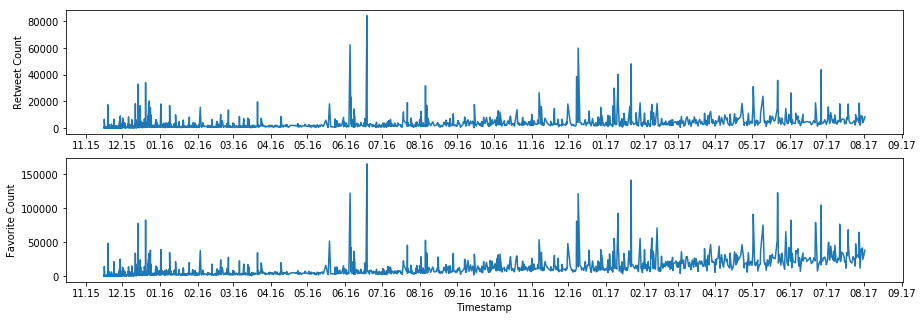

In [54]:
dados = pd.read_csv('twitter_archive_master.csv')
dados.timestamp = pd.to_datetime(dados.timestamp)
mpl_data = mdates.date2num(dados.timestamp.values)
retweet_count = dados.retweet_count.values
favorite_count = dados.favorite_count.values
plt.rcParams['figure.figsize'] = [15,5]
ax = plt.subplot(2, 1, 1)

ax.plot(mpl_data, retweet_count)
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m.%y'))
ax.set(ylabel='Retweet Count')


ax2 = plt.subplot(2, 1, 2)

ax2.plot(mpl_data, favorite_count)
ax2.xaxis.set_major_locator(mdates.MonthLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%m.%y'))
ax2.set(xlabel='Timestamp', ylabel='Favorite Count')


plt.show()

[Text(0,0.5,'Retweet Count'), Text(0.5,0,'Favorite Count')]

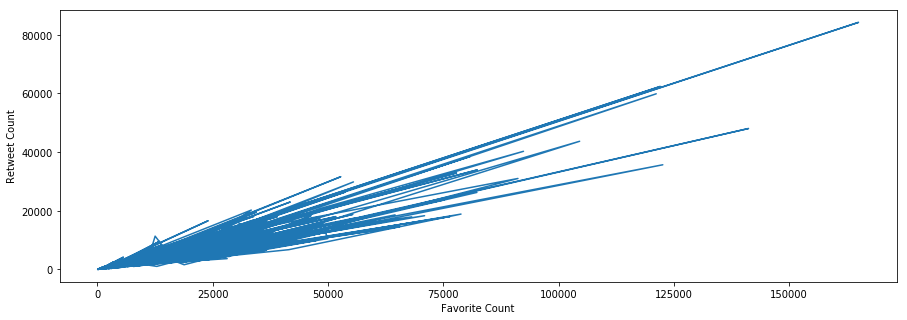

In [57]:
ax = plt.subplot()

ax.plot(favorite_count, retweet_count)

ax.set(xlabel='Favorite Count',ylabel='Retweet Count')

In [65]:
dados.corr()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,img_num,p1_conf,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog,retweet_count,favorite_count,rating
Unnamed: 0,1.000000,-0.950987,-0.680620,NaN,-0.230180,-0.107483,-0.130284,0.006726,-0.130104,0.053340,-0.107937,-0.369030,-0.560893,-0.033403
tweet_id,-0.950987,1.000000,0.685117,NaN,0.212914,0.106467,0.120589,-0.002745,0.123729,-0.049229,0.097605,0.384626,0.612483,0.028658
in_reply_to_status_id,-0.680620,0.685117,1.000000,NaN,0.076881,0.425057,-0.079810,-0.392543,-0.210564,-0.341782,0.133557,0.167874,0.598890,-0.106925
in_reply_to_user_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
img_num,-0.230180,0.212914,0.076881,NaN,1.000000,0.204418,0.032786,-0.156602,0.052465,-0.141426,0.062845,0.103734,0.130053,0.000021
p1_conf,-0.107483,0.106467,0.425057,NaN,0.204418,1.000000,0.126965,-0.509792,0.142273,-0.707994,0.119394,0.050755,0.074537,-0.008526
p1_dog,-0.130284,0.120589,-0.079810,NaN,0.032786,0.126965,1.000000,0.108866,0.635636,0.045794,0.558523,0.004314,0.045256,-0.029172
p2_conf,0.006726,-0.002745,-0.392543,NaN,-0.156602,-0.509792,0.108866,1.000000,0.095718,0.481020,0.063323,-0.015913,-0.018413,-0.014035
p2_dog,-0.130104,0.123729,-0.210564,NaN,0.052465,0.142273,0.635636,0.095718,1.000000,0.033575,0.554565,0.014576,0.054308,-0.034443
p3_conf,0.053340,-0.049229,-0.341782,NaN,-0.141426,-0.707994,0.045794,0.481020,0.033575,1.000000,0.032755,-0.041441,-0.050666,-0.005253


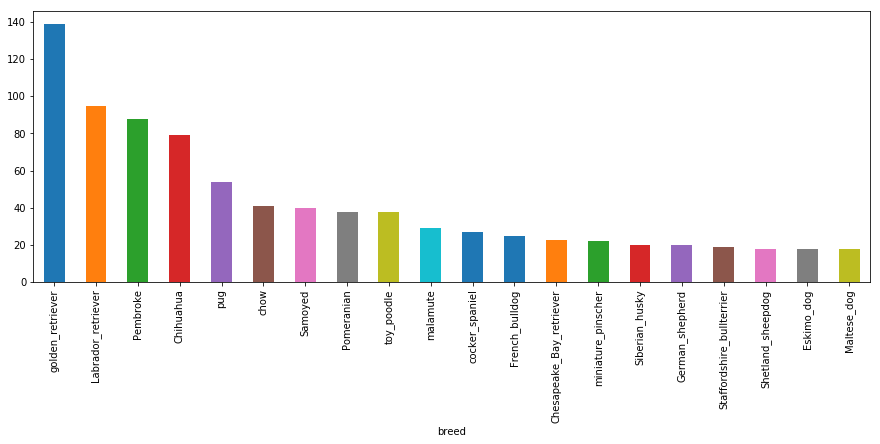

In [82]:
serie = (dados.groupby(['breed'])['tweet_id'].count().sort_values(ascending=False)).head(20)

serie.plot.bar()

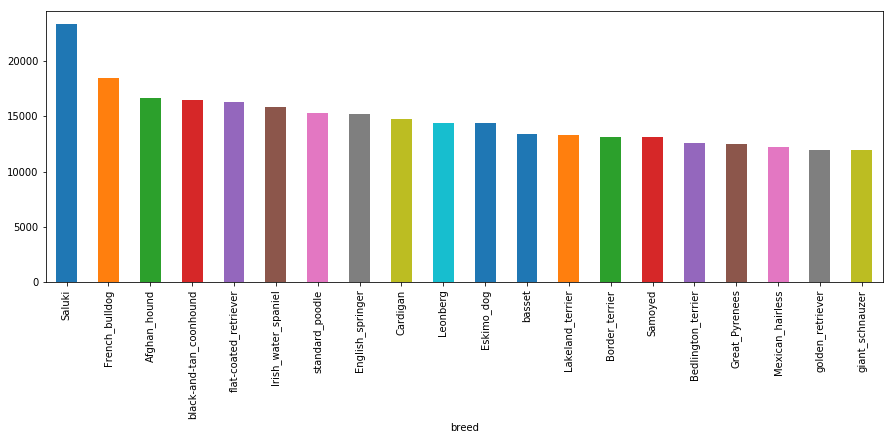

In [87]:
serie_fav = (dados.groupby(['breed'])['favorite_count'].mean().sort_values(ascending=False)).head(20)
serie_ret = (dados.groupby(['breed'])['retweet_count'].mean().sort_values(ascending=False)).head(20)
serie_fav.plot.bar()


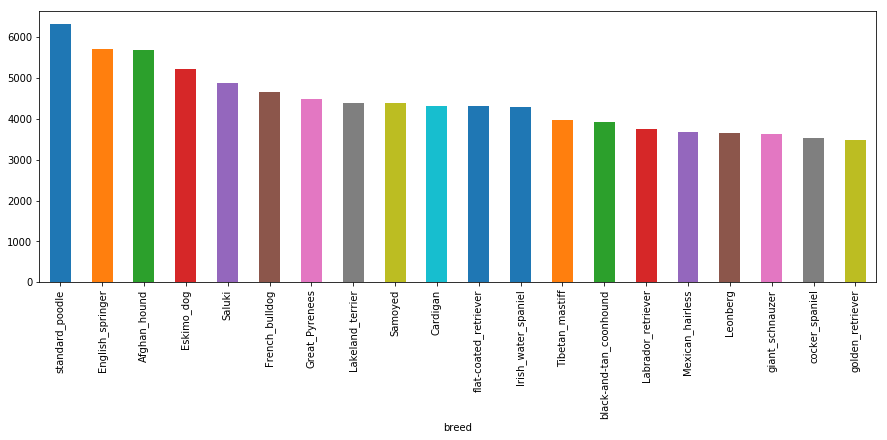

In [86]:
serie_ret.plot.bar()
